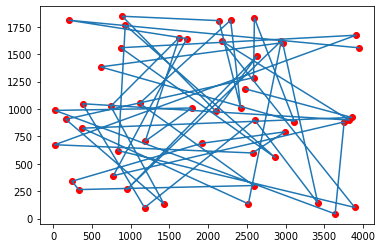

Welcome to the CBC MILP Solver 
Version: devel 
Build Date: Nov 15 2020 

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 100 (0) rows, 2450 (-50) columns and 4900 (0) elements
Clp1000I sum of infeasibilities 7.95366e-06 - average 7.95366e-08, 2421 fixed columns
Coin0506I Presolve 0 (-100) rows, 0 (-2450) columns and 0 (-4900) elements
Clp0000I Optimal - objective value 104188
Clp0000I Optimal - objective value 104188
Coin0511I After Postsolve, objective 104188, infeasibilities - dual 0 (0), primal 0 (0)
Clp0014I Perturbing problem by 0.001% of 1 - largest nonzero change 2.4903109e-05 ( 0.0012451555%) - largest zero change 2.9031261e-05
Clp0000I Optimal - objective value 104188
Clp0000I Optimal - objective value 104188
Clp0000I Optimal - objective value 104188
Coin0511I After Postsolve, objective 104188, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 104188 - 0 iterations time 0.052, Presolve 0.00, Idiot 0.0

Exception ignored from cffi callback <function SolverCbc.optimize.<locals>.cbc_cut_callback at 0x7f53f1c9cf70>:
Traceback (most recent call last):
  File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/mip/cbc.py", line 1083, in cbc_cut_callback
    self.model.lazy_constrs_generator.generate_constrs(
  File "/tmp/ipykernel_53/1551254001.py", line 36, in generate_constrs
  File "/tmp/ipykernel_53/1551254001.py", line 36, in <listcomp>
  File "/tmp/ipykernel_53/1551254001.py", line 36, in <listcomp>
AttributeError: 'NoneType' object has no attribute 'x'
Exception ignored from cffi callback <function SolverCbc.optimize.<locals>.cbc_cut_callback at 0x7f53f1c9cf70>:
Traceback (most recent call last):
  File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/mip/cbc.py", line 1083, in cbc_cut_callback
    self.model.lazy_constrs_generator.generate_constrs(
  File "/tmp/ipykernel_53/1551254001.py", line 36, in generate_constrs
  File "/tmp/ipykernel_

Cbc0004I Integer solution of 119635 found after 615 iterations and 49 nodes (37.19 seconds)
Cbc0038I Full problem 116 rows 2500 columns, reduced to 100 rows 748 columns
Cbc0044I Reduced cost fixing - 100 rows, 748 columns - restarting search
Cbc0012I Integer solution of 119635 found by Previous solution after 0 iterations and 0 nodes (37.27 seconds)
Cbc0031I 16 added rows had average density of 7.25
Cbc0013I At root node, 16 cuts changed objective from 104188 to 115030 in 3 passes
Cbc0014I Cut generator 0 (LazyConstraints) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.028 seconds - new frequency is 1
Cbc0014I Cut generator 1 (Probing) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.008 seconds - new frequency is -100
Cbc0014I Cut generator 2 (Gomory) - 3 row cuts average 129.3 elements, 0 column cuts (0 active)  in 0.001 seconds - new frequency is -100
Cbc0014I Cut generator 3 (Knapsack) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  

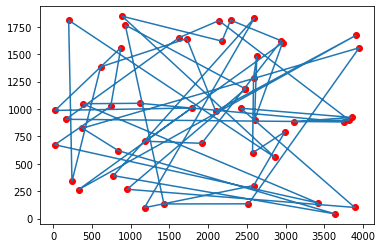

In [1]:
from typing import Tuple, Set, List
from math import floor, cos, acos
from itertools import product
from collections import defaultdict
from sys import stdout as out
from mip import Model, xsum, minimize, BINARY, ConstrsGenerator, CutPool
import matplotlib.pyplot as plt


def subtour(N: Set, outa: defaultdict, node) -> List:
    """checks if a given node belongs to a disconnected sub-route and
    returns involved nodes"""
    queue = [node]
    visited = set(queue)
    while queue:
        n = queue.pop()
        for nl in outa[n]:
            if nl not in visited:
                queue.append(nl)
                visited.add(nl)

    if len(visited) != len(N):
        return list(visited)
    else:
        return []


class SubTourLazyGenerator(ConstrsGenerator):
    """generated sub-tour elimination constraints"""

    def __init__(self, xv):
        self._x = xv

    def generate_constrs(self, model: Model, depth: int = 0, npass: int = 0):
        x_, N, cp = model.translate(self._x), range(len(self._x)), CutPool()
        outa = [[j for j in N if x_[i][j].x >= 0.99] for i in N]

        for node in N:
            S = set(subtour(N, outa, node))
            if S:
                AS = [(i, j) for (i, j) in product(S, S) if i != j]
                cut = xsum(x_[i][j] for (i, j) in AS) <= len(S) - 1
                cp.add(cut)
        for cut in cp.cuts:
            model += cut


# constants as stated in TSPlib doc
# https://www.iwr.uni-heidelberg.de/groups/comopt/software/TSPLIB95/tsp95.pdf
PI = 3.141592
RRR = 6378.388


def rad(val: float) -> float:
    """converts to radians"""
    mult = 1.0
    if val < 0.0:
        mult = -1.0
        val = abs(val)

    deg = float(floor(val))
    minute = val - deg
    return (PI * (deg + 5 * minute / 3) / 180) * mult


def dist(p1: Tuple[float, float], p2: Tuple[float, float]) -> float:
    """computes geographical distance"""
    q1 = cos(p1[1] - p2[1])
    q2 = cos(p1[0] - p2[0])
    q3 = cos(p1[0] + p2[0])
    return int(
        floor(RRR * acos(0.5 * ((1.0 + q1) * q2 - (1.0 - q1) * q3)) + 1.0)
    )

def draw(x,y):
    plt.plot(x, y)
    plt.scatter(x, y, c='r')
    plt.show()
    

filename = 'Input.txt'

xx=[]
yy=[]
coord =[]
quantity_points = 0

#чтение из файла
with open(filename, 'r') as f:
    for line in f:
        if quantity_points == 0:
            quantity_points = int(line) 
        else:
            coord.append([int(line.split()[0]),int(line.split()[1])])
            xx.append(int(line.split()[0]))
            yy.append(int(line.split()[1]))

route = list(range(0,quantity_points))

#input 
draw(xx,yy)
        
# latitude and longitude
coord = [(rad(x), rad(y)) for (x, y) in coord]

# distances in an upper triangular matrix

# number of nodes and list of vertices
n, V = len(coord), set(range(len(coord)))

# distances matrix
c = [[0 if i == j else dist(coord[i], coord[j]) for j in V] for i in V]

model = Model()

# binary variables indicating if arc (i,j) is used on the route or not
x = [[model.add_var(var_type=BINARY) for j in V] for i in V]

# objective function: minimize the distance
model.objective = minimize(xsum(c[i][j] * x[i][j] for i in V for j in V))

# constraint : leave each city only once
for i in V:
    model += xsum(x[i][j] for j in V - {i}) == 1

# constraint : enter each city only once
for i in V:
    model += xsum(x[j][i] for j in V - {i}) == 1

model.lazy_constrs_generator = SubTourLazyGenerator(x)

# optimizing
model.optimize()

string = '0 '
nx = []
ny = []
nroute = []
nroute.append(0)

# checking if a solution was found
if model.num_solutions:
    out.write(
        "route with total distance %g found: %s" % (model.objective_value, 0)
    )
    nc = 0
    nroute.append(0)
    while True:
        nc = [i for i in V if x[nc][i].x >= 0.99][0]
        out.write(" -> %s" % nc) 
        string = string + str(nc) + ' '
        nroute.append(nc)
        if nc == 0:
            break
    out.write("\n")

#writing output
f = open('Output.txt', 'w')
f.write(str(model.objective_value)+'\n')
f.write(string)
f.close()

for i in nroute:
    nx.append(xx[i])
    ny.append(yy[i])

draw(nx,ny)